### __Project 5: Data Analytics for Pricing Trends__

__Scenario:__

You're tasked with building sustainable analytical models to analyze pricing trends in the telecommunications industry. You have historical pricing data and want to identify trends and patterns.

__Tasks:__

*   Load the data containing information about average price, win-loss ratio, and sales volume, for a two-year period.
*   Build analytical models, including a Simple Moving Average for pricing trends and identifying trends in the Win-Loss Ratio.
*   Visualize pricing trends and Win-Loss Ratio over time.
*   Print the average price trend and Win-Loss Ratio trend.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the pricing_data.csv
pricing_trends_data_realistic = pd.read_csv("pricing_trends_data_realistic.csv")

pricing_trends_data_realistic.head()

,Month,categories,average_price_history,pricing_trends,win_loss_ratios,sales_volumes,Cost
0,2022-01-31,Service B,47.490802,0.051985,0.481718,1490.409006,18.232029
1,2022-02-28,Service A,59.014286,0.026613,0.542412,1238.720061,20.187906
2,2022-03-31,Product A,54.639879,0.031013,0.563149,1490.348901,22.030190
3,2022-04-30,Service C,51.973170,0.008629,0.684570,1784.509142,18.636296
4,2022-05-31,Product A,43.120373,0.021834,0.627489,1391.043490,24.717821


In [4]:
# Calculate average price based on historical data and pricing trends
pricing_trends_data_realistic['average_price_realistic'] = pricing_trends_data_realistic['average_price_history'] * (1 + pricing_trends_data_realistic['pricing_trends'])

pricing_trends_data_realistic.head()

,Month,categories,average_price_history,pricing_trends,win_loss_ratios,sales_volumes,Cost,average_price_realistic
0,2022-01-31,Service B,47.490802,0.051985,0.481718,1490.409006,18.232029,49.959599
1,2022-02-28,Service A,59.014286,0.026613,0.542412,1238.720061,20.187906,60.584854
2,2022-03-31,Product A,54.639879,0.031013,0.563149,1490.348901,22.030190,56.334421
3,2022-04-30,Service C,51.973170,0.008629,0.684570,1784.509142,18.636296,52.421635
4,2022-05-31,Product A,43.120373,0.021834,0.627489,1391.043490,24.717821,44.061874


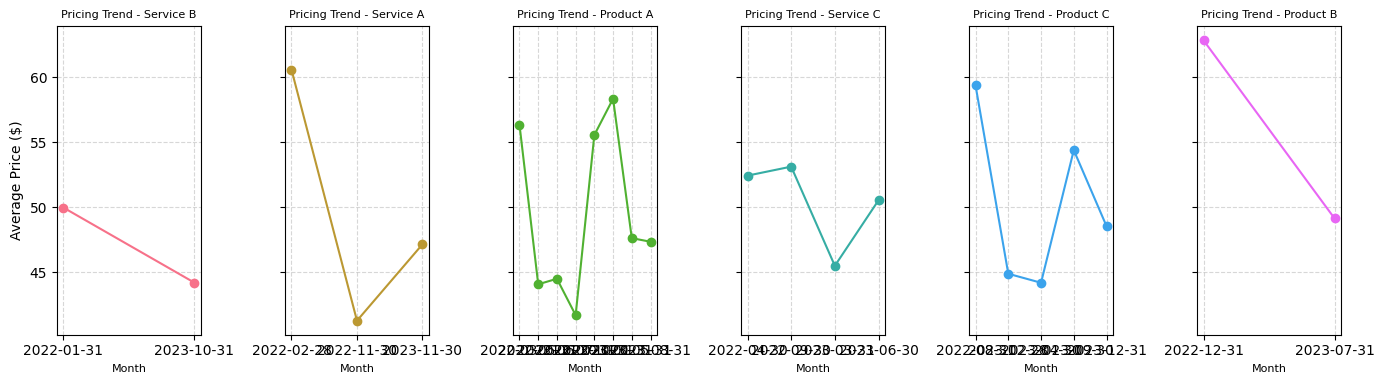

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Assuming pricing_trends_data_realistic has columns 'Month', 'categories', and 'average_price_realistic' (replace with your actual column names)

# Set a color palette for better differentiation
palette = sns.color_palette("husl", n_colors=len(pricing_trends_data_realistic['categories'].unique()))

# Create subplots in a single line
fig, axes = plt.subplots(1, len(pricing_trends_data_realistic['categories'].unique()), figsize=(14, 4), sharey=True)

# Plotting pricing trends for different categories
for i, (category, color, ax) in enumerate(zip(pricing_trends_data_realistic['categories'].unique(), palette, axes)):
    category_data = pricing_trends_data_realistic[pricing_trends_data_realistic['categories'] == category]
    ax.plot(category_data['Month'], category_data['average_price_realistic'], label=category, marker='o', color=color)

    # Adding grid lines for better readability
    ax.grid(True, linestyle='--', alpha=0.5)

    # Adding labels and title with reduced font size
    if i == 0:  # Only one y-axis title on the leftmost axis
        ax.set_ylabel('Average Price ($)', fontsize=10)
    ax.set_title(f'Pricing Trend - {category}', fontsize=8)
    ax.set_xlabel('Month', fontsize=8)

# Enhancing aesthetics with seaborn style
sns.set(style="whitegrid")

# Adjusting layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


In [6]:
# Calculate additional KPIs and metrics
for category in pricing_trends_data_realistic['categories'].unique():
  pricing_trends_data_realistic['Revenue'] = pricing_trends_data_realistic['average_price_realistic'] * pricing_trends_data_realistic['sales_volumes']
  pricing_trends_data_realistic['Profit_Margin'] = (pricing_trends_data_realistic['Revenue'] - pricing_trends_data_realistic['Cost']) / pricing_trends_data_realistic['Revenue'] * 100

pricing_trends_data_realistic.head()

,Month,categories,average_price_history,pricing_trends,win_loss_ratios,sales_volumes,Cost,average_price_realistic,Revenue,Profit_Margin
0,2022-01-31,Service B,47.490802,0.051985,0.481718,1490.409006,18.232029,49.959599,74460.236282,99.975514
1,2022-02-28,Service A,59.014286,0.026613,0.542412,1238.720061,20.187906,60.584854,75047.674440,99.973100
2,2022-03-31,Product A,54.639879,0.031013,0.563149,1490.348901,22.030190,56.334421,83957.942738,99.973760
3,2022-04-30,Service C,51.973170,0.008629,0.684570,1784.509142,18.636296,52.421635,93546.886137,99.980078
4,2022-05-31,Product A,43.120373,0.021834,0.627489,1391.043490,24.717821,44.061874,61291.983277,99.959672


In [7]:
# Calculate additional KPIs related to price elasticity and revenue growth
pricing_trends_data_realistic['Price_Elasticity'] = pricing_trends_data_realistic['sales_volumes'] / pricing_trends_data_realistic['average_price_realistic'] * 100
pricing_trends_data_realistic['Revenue_Growth'] = pricing_trends_data_realistic['Revenue'].pct_change() * 100

pricing_trends_data_realistic.head()

,Month,categories,average_price_history,pricing_trends,win_loss_ratios,sales_volumes,Cost,average_price_realistic,Revenue,Profit_Margin,Price_Elasticity,Revenue_Growth
0,2022-01-31,Service B,47.490802,0.051985,0.481718,1490.409006,18.232029,49.959599,74460.236282,99.975514,2983.228521,NaN
1,2022-02-28,Service A,59.014286,0.026613,0.542412,1238.720061,20.187906,60.584854,75047.674440,99.973100,2044.603516,0.788929
2,2022-03-31,Product A,54.639879,0.031013,0.563149,1490.348901,22.030190,56.334421,83957.942738,99.973760,2645.538677,11.872811
3,2022-04-30,Service C,51.973170,0.008629,0.684570,1784.509142,18.636296,52.421635,93546.886137,99.980078,3404.146314,11.421127
4,2022-05-31,Product A,43.120373,0.021834,0.627489,1391.043490,24.717821,44.061874,61291.983277,99.959672,3157.022971,-34.479932


In [8]:
# Assess win-loss ratios, sales volumes, and additional metrics
average_win_loss_ratio = pricing_trends_data_realistic['win_loss_ratios'].mean()
average_sales_volume = pricing_trends_data_realistic['sales_volumes'].mean()
average_profit_margin = pricing_trends_data_realistic['Profit_Margin'].mean()
average_price_elasticity = pricing_trends_data_realistic['Price_Elasticity'].mean()
average_revenue_growth = pricing_trends_data_realistic['Revenue_Growth'].mean()

print(f"Average Win-Loss Ratio: {average_win_loss_ratio:.2f}")
print(f"Average Sales Volume: {average_sales_volume:.2f}")
print(f"Average Profit Margin: {average_profit_margin:.2f}%")
print(f"Average Price Elasticity: {average_price_elasticity:.2f}")
print(f"Average Revenue Growth: {average_revenue_growth:.2f}%")

Average Win-Loss Ratio: 0.60
Average Sales Volume: 1413.74
Average Profit Margin: 99.97%
Average Price Elasticity: 2865.50
Average Revenue Growth: 7.52%
